In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
cpp_data = pd.read_csv("cpp_result.csv")
py_data = pd.read_csv("python_result.csv", sep=",")

ultralytics_data = pd.read_csv("ultralytics_result.csv")
ultralytics = ultralytics_data.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()

## TensorRT: C++ vs Python vs Ultralytics

In [18]:
cpp_trt = cpp_data[cpp_data["Backend"] == "TRT"]
py_trt = py_data[py_data["Backend"] == "TRT"]

In [19]:
cpp_trt = cpp_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_trt = py_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()

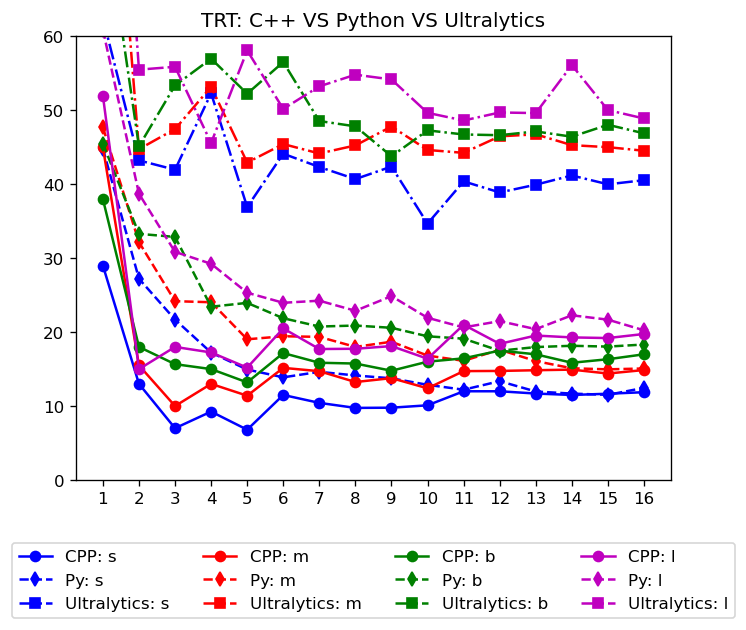

In [21]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]

ticks = list(range(1, cpp_trt.shape[1]+1))
for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, cpp_trt[j], f"{c}-o", label=f"CPP: {lbl}")
    plt.plot(ticks, py_trt[j], f"{c}--d", label=f"Py: {lbl}")
    plt.plot(ticks, ultralytics[j], f"{c}-.s", label=f"Ultralytics: {lbl}")

plt.legend(ncols=4, bbox_to_anchor=(0.5,-0.33), loc="lower center")
plt.title("TRT: C++ VS Python VS Ultralytics")
plt.xticks(ticks)

plt.gcf().set_dpi(120)
plt.ylim(0, 60)
plt.show()

## C++: TRT vs ONNX (auto)

In [7]:
cpp_trt = cpp_data[cpp_data["Backend"] == "TRT"]
cpp_onnx = cpp_data[(cpp_data["Backend"] == "ONNX") & (cpp_data["NumThreads"] == -1)]

In [8]:
cpp_trt = cpp_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
cpp_onnx = cpp_onnx.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
cpp_trt.shape, cpp_onnx.shape

((4, 16), (4, 16))

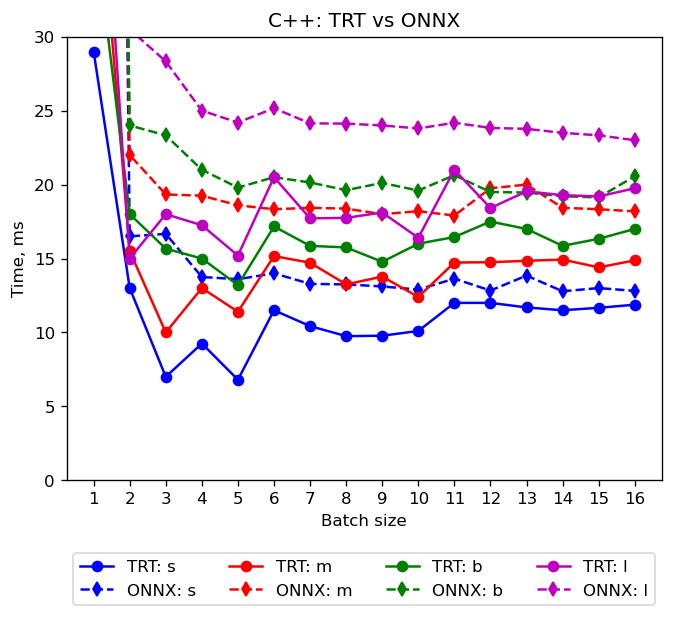

In [14]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, cpp_trt.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, cpp_trt[j], f"{c}-o", label=f"TRT: {lbl}")
    plt.plot(ticks, cpp_onnx[j], f"{c}--d", label=f"ONNX: {lbl}")

plt.ylabel("Time, ms")
plt.xlabel("Batch size")
plt.legend(ncols=4, bbox_to_anchor=(0.5,-0.3), loc="lower center")
plt.title("C++: TRT vs ONNX")
plt.xticks(ticks)

plt.gcf().set_dpi(120)
plt.ylim(0, 30)
plt.show()

## Python: TRT vs ONNX (auto) vs Ultralytics

In [10]:
py_trt = py_data[py_data["Backend"] == "TRT"]
py_onnx = py_data[(py_data["Backend"] == "ONNX") & (py_data["NumThreads"] == -1)]

In [11]:
py_trt = py_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_onnx = py_onnx.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_trt.shape, py_onnx.shape

((4, 16), (4, 16))

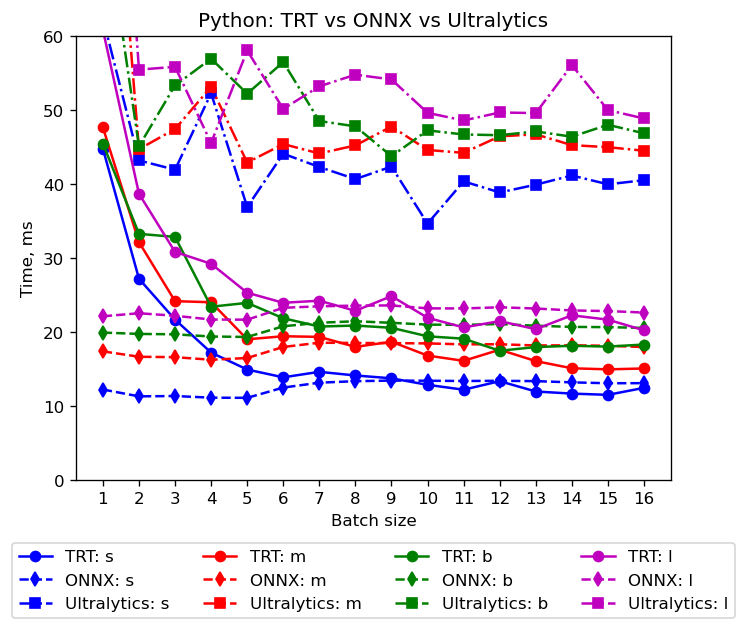

In [13]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, py_trt.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, py_trt[j], f"{c}-o", label=f"TRT: {lbl}")
    plt.plot(ticks, py_onnx[j], f"{c}--d", label=f"ONNX: {lbl}")
    plt.plot(ticks, ultralytics[j], f"{c}-.s", label=f"Ultralytics: {lbl}")

plt.ylabel("Time, ms")
plt.xlabel("Batch size")

plt.legend(ncols=4, bbox_to_anchor=(0.5,-0.33), loc="lower center")
plt.title("Python: TRT vs ONNX vs Ultralytics")
plt.xticks(ticks)

plt.ylim(0, 60)
plt.gcf().set_dpi(120)
plt.show()

## ONNX Threads

In [49]:
model = "l"

py_auto = py_data[(py_data["Backend"] == "ONNX") & (py_data["NumThreads"] == -1) & (py_data["Model"] == model)]
py_1 = py_data[(py_data["Backend"] == "ONNX") & (py_data["NumThreads"] == 1) & (py_data["Model"] == model)]
py_8 = py_data[(py_data["Backend"] == "ONNX") & (py_data["NumThreads"] == 8) & (py_data["Model"] == model)]

py_auto = py_auto.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_1 = py_1.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_8 = py_8.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()



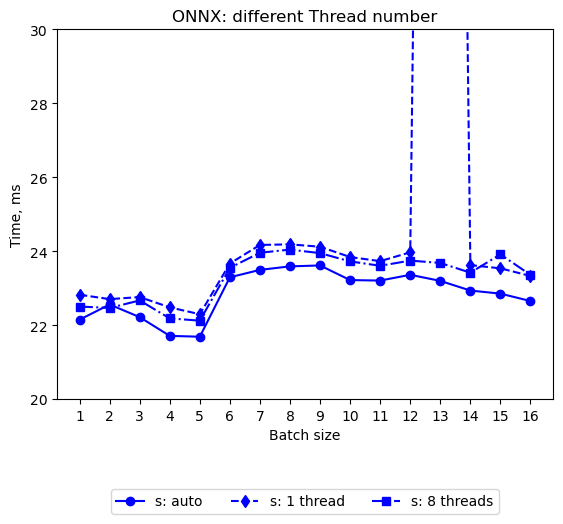

In [52]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, py_trt.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, py_auto[j], f"{c}-o", label=f"{lbl}: auto")
    plt.plot(ticks, py_1[j], f"{c}--d", label=f"{lbl}: 1 thread")
    plt.plot(ticks, py_8[j], f"{c}-.s", label=f"{lbl}: 8 threads")
    break

plt.ylabel("Time, ms")
plt.xlabel("Batch size")

plt.legend(ncols=4, bbox_to_anchor=(0.5,-0.33), loc="lower center")
plt.title("ONNX: different Thread number")
plt.xticks(ticks)

plt.ylim(20, 30)
plt.show()

## CPU/GPU

In [37]:
ultralytics_data = pd.read_csv("ultralytics_result_devices.csv")

In [38]:
ultralytics_gpu = ultralytics_data[ultralytics_data["Device"] == "gpu"]
ultralytics_gpu = ultralytics_gpu.drop(["Backend", "Model", "Device"], axis=1).to_numpy()

ultralytics_cpu = ultralytics_data[ultralytics_data["Device"] == "cpu"]
ultralytics_cpu = ultralytics_cpu.drop(["Backend", "Model", "Device"], axis=1).to_numpy()

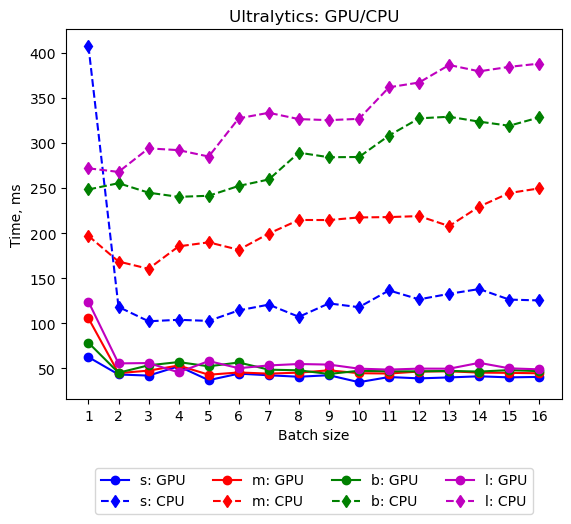

In [39]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, py_trt.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, ultralytics_gpu[j], f"{c}-o", label=f"{lbl}: GPU")
    plt.plot(ticks, ultralytics_cpu[j], f"{c}--d", label=f"{lbl}: CPU")
    

plt.ylabel("Time, ms")
plt.xlabel("Batch size")

plt.legend(ncols=4, bbox_to_anchor=(0.5,-0.33), loc="lower center")
plt.title("Ultralytics: GPU/CPU")
plt.xticks(ticks)

plt.show()